In [81]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, log
from math import pi, exp

global x, y, n

In [82]:
f=open("иркутск.txt")
mass=[]
for line in f:
    mass+=[[float(i) for i in str(line).split()]]
#print(mass[:10])

# Интерполяция сплайном

In [83]:
x=[]
y=[]
#1874
a=1860-1820
a=2
h=1
i=a

while i-a<12:
    if mass[i][6]!=999.9:
        x+=[mass[i][0]]
        y+=[mass[i][6]]
    else: print(mass[i][0])
    i+=1


n=len(x)
h=[x[i]-x[i-1] for i in range(1, len(x))]
nh=len(h)


In [84]:

matrix=[[1]+[0]*(n-1)]

for i in range(1, n-1):
    #print(i, [h[i-1], 2*(h[i-1]+h[i]), h[i]])
    matrix+=[[0]*(i-1)+[h[i-1], 2*(h[i-1]+h[i]), h[i]]+[0]*(n-2-i)]

matrix+=[[0]*(n-1)+[1]]

f=[0]
for i in range(1, n-1):
    #i=j-1
    print(i, y[i+1], y[i], y[i-1], h[i-1], h[i])
    f+=[6*(  (y[i+1]-y[i]) / h[i]  -  (y[i]-y[i-1]) / h[i-1]  )]
    #f2_str+=["6*(("+ys[i+1]+"-"+ys[i]+")/h[i+1]-("+ys[i]+"-"+ys[i-1]+")/h[i])"]
f+=[0]


1 15.6 15.9 15.1 1.0 1.0
2 17.4 15.6 15.9 1.0 1.0
3 17.4 17.4 15.6 1.0 1.0
4 17.9 17.4 17.4 1.0 1.0
5 15.0 17.9 17.4 1.0 1.0
6 14.5 15.0 17.9 1.0 1.0
7 14.9 14.5 15.0 1.0 1.0
8 16.8 14.9 14.5 1.0 1.0
9 15.5 16.8 14.9 1.0 1.0
10 13.1 15.5 16.8 1.0 1.0


In [85]:
ans = np.linalg.solve(matrix, f)

In [86]:
c=[elem for elem in ans]
a=[0]+[y[i] for i in range(1, n)]

d=[0]+[(c[i]-c[i-1])/h[i-1] for i in range(1, n)]

b=[0]+[ ((y[i]-y[i-1])/h[i-1]+c[i]*h[i-1]/3+c[i-1]*h[i-1]/6) for i in range(1, n) ]


print(len(a), a)
print(len(b), b)
print(len(c), c)
print(len(d), d)

12 [0, 15.9, 15.6, 17.4, 17.4, 17.9, 15.0, 14.5, 14.9, 16.8, 15.5, 13.1]
12 [0, -0.17655719039026485, 0.9179501663659262, 1.004756524926556, 0.46302373392784724, -1.3568514606379445, -2.235617891376064, 0.099323026142205, 1.5383257868072446, 0.6473738266288188, -2.32782109332252, -2.4360894533387403]
12 [0.0, -2.929671571170797, 5.118686284683179, -4.945073567561918, 3.861607985564501, -7.501358374696085, 5.7438255132198455, -1.0739436781833076, 3.9519491995133866, -5.733853119870238, -0.21653672003243982, 0.0]
12 [0, -2.929671571170797, 8.048357855853975, -10.063759852245097, 8.806681553126419, -11.362966360260586, 13.24518388791593, -6.817769191403153, 5.025892877696695, -9.685802319383624, 5.5173163998377985, 0.21653672003243982]


In [87]:
def f(point, a, b, c, d):
    for i in range(1, len(x)):
        if x[i-1]<point<x[i]:
            return a[i]+b[i]*(point-x[i])+ c[i]/2*(point-x[i])**2+d[i]/6*(point-x[i])**3
   

In [88]:
x1=np.arange(min(x),max(x), 0.001)
y1=[f(elem, a, b, c, d) for elem in x1]

[1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0] [15.1, 15.9, 15.6, 17.4, 17.4, 17.9, 15.0, 14.5, 14.9, 16.8, 15.5, 13.1]


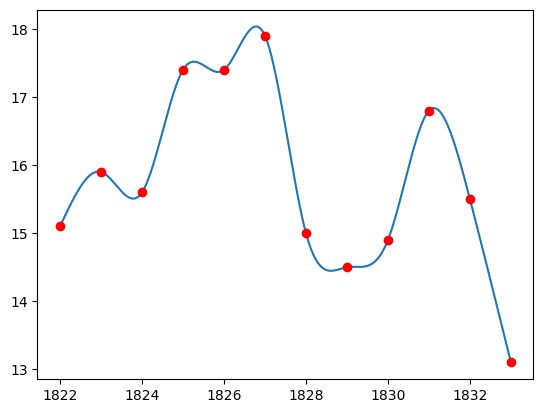

In [89]:
plt.plot(x1, y1)
plt.plot(x[:len(x)], y[:len(x)], 'ro')
print(x[:len(x)], y[:len(x)])

In [90]:
x12=np.arange(1828,1830, 0.001)
y12=[f(elem, a, b, c, d) for elem in x12]

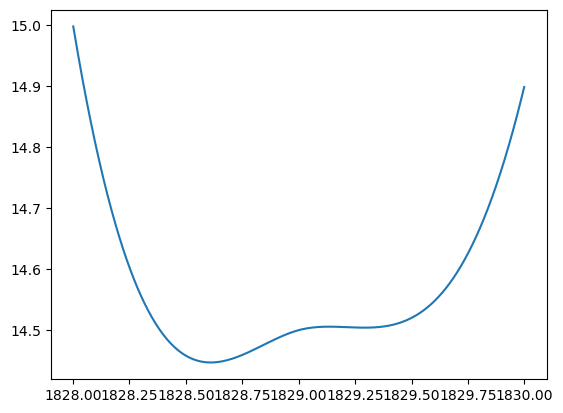

In [91]:
plt.plot(x12, y12)

# Интерполяция тригонометрическими функциями

In [92]:
x=[]
y=[]
a=1

x_correct=[]
y_correct=[]

i=a
temp=mass[5][6]
for elem in mass:
    x+=[elem[0]]
    if elem[6]==999.9:
        y+=[temp]
    else:
        x_correct+=[elem[0]]
        y_correct+=[elem[6]]
        y+=[elem[6]]
        temp=elem[6]
x+=[x[len(x)-1]+1]
y+=[y[0]]
n=len(x)


In [93]:
def a(k):
    n=len(x)
    m=[y[i]*cos(2*pi*k*i/n) for i in range(0, n)]
    s=0
    for elem in m:
        s+= elem
    return 2*s/n

In [94]:
def b(k):
    n=len(x)
    m=[y[i]*sin(2*pi*k*i/n) for i in range(0, n)]
    s=0
    for elem in m:
        s+= elem
    return 2*s/n

In [95]:
def P(point):
    n=len(x)
    bj=[a(k)*cos(2*pi*k*(-x[0]+point)/n)  for k in range(1, int(n/2.))]
    aj=[b(k)*sin(2*pi*k*(-x[0]+point)/n)  for k in range(1, int(n/2.))]
    s=0
    for elem in y:
        s+=elem
    s=(s)/(n)
    for elem in bj:
        s+=elem
    for elem in aj:
        s+=elem
    return s

In [96]:
x1=np.arange(min(x),max(x)+0.1, 0.1)
y1=P(x1)

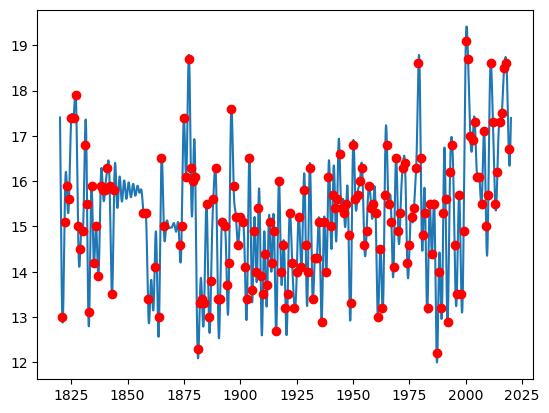

In [97]:
plt.plot(x1, y1)
plt.plot(x_correct, y_correct, 'ro')

# Апроксимация системой ортогональных функций

In [98]:
x=[]
y=[]
a=1

x_correct=[]
y_correct=[]

i=a
temp=mass[5][6]
for elem in mass:
    x+=[elem[0]]
    if elem[6]==999.9:
        y+=[temp]
    else:
        x_correct+=[elem[0]]
        y_correct+=[elem[6]]
        y+=[elem[6]]
        temp=elem[6]
x+=[x[len(x)-1]+1]
y+=[y[0]]
n=len(x)

print(x)
print(y)
print(len(x), len(y))

[1820.0, 1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0, 1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842.0, 1843.0, 1844.0, 1845.0, 1846.0, 1847.0, 1848.0, 1849.0, 1850.0, 1851.0, 1852.0, 1853.0, 1854.0, 1855.0, 1856.0, 1857.0, 1858.0, 1859.0, 1860.0, 1861.0, 1862.0, 1863.0, 1864.0, 1865.0, 1866.0, 1867.0, 1868.0, 1869.0, 1870.0, 1871.0, 1872.0, 1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0,

In [99]:
def eexp(x):
    return 2.71828182845904**(1j*x)


In [100]:
def c(k):
    n=len(x)
    c_mass=[y[p]*eexp(p*k*2*pi/n ) for p in range(1, n)]
    s1=0+0j
    for elem in c_mass:
        s1+=elem
    return s1/n

In [101]:
def Q(point, N):
    n=len(x)
    #m=[ (c(k)* eexp(point*k/(n))) for k in range( 0, int(n))]
    mmm=np.arange(0, N, 2*pi)
    m=[ (c(k)* eexp(point*k/n)) for k in mmm]
    s1=0
    for elem in m:
        s1+=elem
    return (s1).real

In [102]:
def Qn(point):
    n=len(x)
    mmm=np.arange(0, n, 2*pi)
    m=[ (c(k)* eexp(point*k/n)) for k in mmm]
    s1=0
    for elem in m:
        s1+=elem
    return (s1).real

In [103]:

N=n-1
epsilon=20.555
delta=5000
while abs(delta-epsilon)>0.005:
    #ro k == 1
    m=[(y[i]-Q(x[i], N))**2 for i in range(n)]
    delta=0
    for elem in m:
        delta+=elem.real
    delta=(delta**0.5)
    if  abs(delta-epsilon)>1: N+=2*pi
    else: N-=2*pi

#N=minN

print(N)


143.45133223538366


In [104]:
x1=np.arange(min(x),max(x)+0.1, 0.1)
y1=[Q(elem, N) for elem in x1]

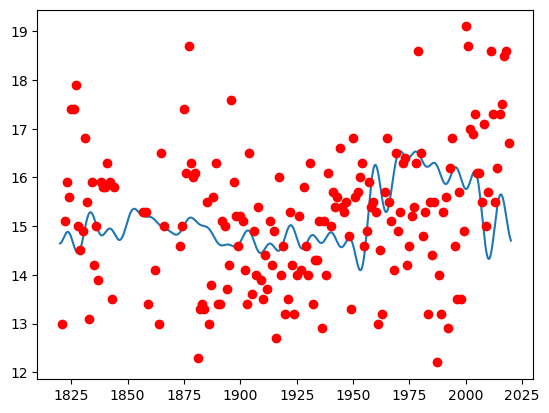

In [105]:
plt.plot(x1, y1)
plt.plot(x_correct, y_correct, 'ro')
#print(x[:len(x)-2], y[:len(x)-2])
